# Getting Started - Reading Data

# Introduction

Welcome to the [dClimate](https://www.dclimate.net/) Getting Started Jupyter notebook. This notebook should give you all the tools you need to begin your decentralized GIS journey. To learn more about our architecture decisions in-depth please read https://blog.dclimate.net/introducing-zarrchitecture-on-dclimate/

Let's first define some things to ensure we are all on the same page. If you are new to [DeSci](https://ethereum.org/en/desci/?ref=blog.dclimate.net) (Decentralized Science - we'll get back to this later) I would suggest for you to stick around. 

# Background

## What is decentralization? 

To summarize, decentralization is the process by which our modes of communication and access shift from relying on central authorities or gatekeepers. (e.g., a single institution or platform) to a model where ownership, control, and decision-making are distributed across many independent participants or nodes in a network. In simpler terms, instead of relying on servers where we're a client trying to access from an API, we are all client-servers, able to not only get information but also share information with peers. 

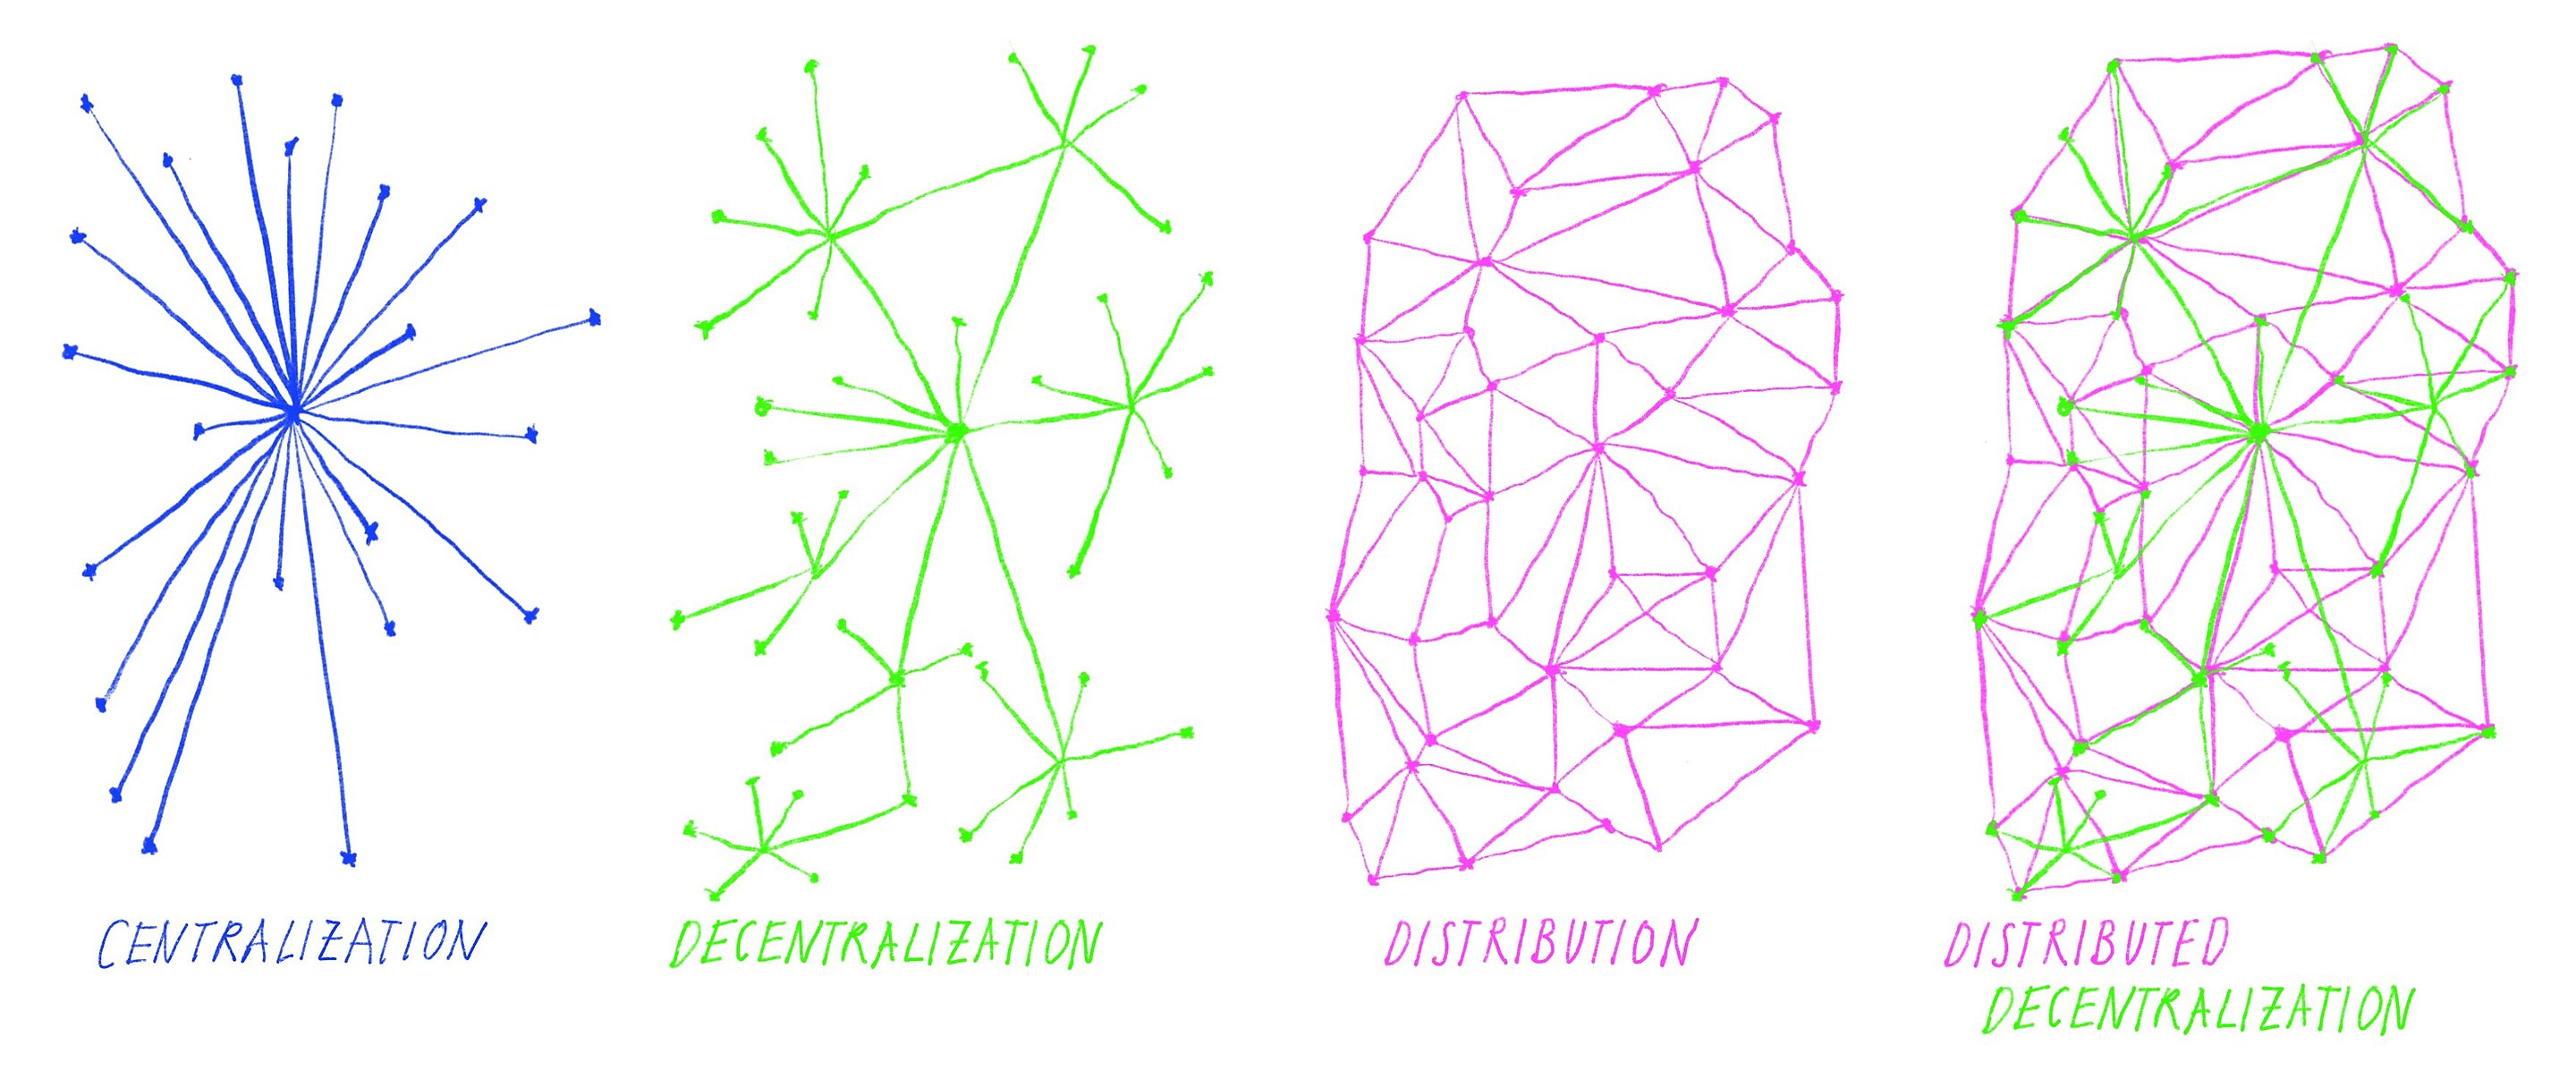

This model may be familiar to those of you who have used P2P ([peer-to-peer](https://en.wikipedia.org/wiki/Peer-to-peer)) software such as [Bittorrent](https://en.wikipedia.org/wiki/BitTorrent). Instead of downloading from a central server, many different actors share data through the network.

## Why is decentralization important?

In the context of data sharing, decentralization has many advantages:
 
- In a decentralized model, data is stored by a peer-to-peer network of nodes that each hold part or the entirety of a dataset. No single node has the power to alter or delete data without network consensus, enhancing data **integrity** and reducing single points of failure. Additionally, unlike in traditional systems where you access data from one location via a url, in decentralized storage systems such as [IPFS](https://docs.ipfs.tech/), which dClimate uses, content is asked for via [hash](https://fleek.xyz/blog/learn/understanding-content-identifiers-ipfs-onchain-hosting-and-storage/#:~:text=What%20is%20content%20addressing%20in,location%20of%20those%20devices%20changes.). In other words you tell the network you want this "hash" and all the nodes gossip to get you the data you are looking for. This results in increased **data availability**.
- Decentralized systems rely on cryptographic proofs, consensus mechanisms, and transparent logs of transactions or validations to build trust. Peer review or data validation can occur openly, making any manipulations or errors easier to detect. **Reproducibility** is very important in citizen science. Oftentimes it is very difficult to replicate findings in a study because data is hard to get as a result of centralization. Decentralized technologies allow us to replicate data across various sources with strict data integrity (in other words you don't have to worry someone else hosting the data can change that data).
- A decentralized network remains **resilient** because the data and governance rules are replicated across many nodes. No single point of failure or censorship can prevent the system from functioning. In traditional centralized networks, if an API goes down, data is inaccessible, which many of us have seen before. Decentralized networks ensure that as long as data is replicated somewhere in the network it will be accessible.

You may hear about decentralization in the context of blockchain but we don't have to worry about that for now. Just know that blockchains use many of these same concepts for building permissionless applications.

## How does decentralization work in the context of GIS?

Traditional GIS software normally relies on retrieving data from APIs or cloud services (e.g. buckets) such as Amazon S3. In the case of APIs, you normally have to deal with tokens, rate limiting, and the API uptime. These APIs often go down or are unavailable during maintenance. In the case of Amazon S3, you normally have to pay data bandwidth fees (egress), which for GIS analysis can be significant. It becomes very difficult for multiple people or organizations to share data between each other to reduce the load of storing and sharing the data.

What if there was a better way? There are peer to peer filesharing platforms such as [BitTorrent](https://en.wikipedia.org/wiki/BitTorrent), but what if there also was a method that could replace cloud services like Amazon S3? Enter IPFS (Interplanetary File System)

### IPFS

As defined on the [IPFS website](https://ipfs.tech/developers/), "IPFS is a modular suite of protocols and standards for organizing and moving data, designed from the ground up with the principles of content addressing and peer-to-peer networking." **In simpler terms**, it can be seen as the software that runs as a "node" on your computer which allows you to read and share data on a decentralized network seamlessly with all the benefits mentioned above. Instead of requesting data from one location, you provide a hash (identifier) of the data to the network and the network retrieves it for you from wherever it is stored. You can learn more about how IPFS works via the [IPFS Primer](https://dweb-primer.ipfs.io/) and related concepts at [ProtoSchool](https://proto.school/tutorials).

### Zarr

[Zarr](https://zarr.readthedocs.io/en/stable/getting_started.html) is an open source cloud optimized data specification for storing n-dimensional. Data is split into parts called chunks along some dimension, the chunks have incremental values (e.g 0.1.0 - a value for each dimension) which is then associated to the bytes for that chunk, and then stored in a key/value data manifest. This means that n-dimensional data such as gridded raster data can be stored and read without requiring the need for a traditional running server which calculates these chunks per request. You may already be familiar with [NetCDF](https://en.wikipedia.org/wiki/NetCDF), GRIB, GeoTIFF - Zarr serves as a way to provide similar functionality with reduced server overhead. 

### How do you access Zarr data on IPFS?

Using the [py-hamt](https://github.com/dClimate/py-hamt) library developed by [dClimate](https://www.dclimate.net/) you are able to read zarr datasets directly from IPFS via traditional data analysis tools such as [xarray](https://docs.xarray.dev/en/stable/). Py-hamt leverages concepts such as [IPLD](https://ipld.io/) and [HAMT](https://ipld.io/specs/advanced-data-layouts/hamt/spec/#summary) in order to serve data in a seamless and distributed fashion directly from IPFS with no strings attached. Just use the hashes we provide as examples to read datasets or learn how to create your own by onboarding data into the decentralized ecosystem by visiting the example [Creating an ETL - CPC](./Creating%20an%20ETL%20-%20CPC.ipynb)


# What is this notebook? 

This [Jupyter notebook](https://jupyter.org/) has IPFS loaded on the same container* whether it is deployed via [Github Codespaces](https://github.com/codespaces), locally with [Docker](https://en.wikipedia.org/wiki/Docker_(software)), or deployed on a platform such as [Railway](https://railway.com/). 

* "A container is a standard unit of software that packages up code and all its dependencies so the application runs quickly and reliably from one computing environment to another. A Docker container image is a lightweight, standalone, executable package of software that includes everything needed to run an application: code, runtime, system tools, system libraries and settings." - https://www.docker.com/resources/what-container/#:~:text=A%20Docker%20container%20image%20is,tools%2C%20system%20libraries%20and%20settings. 

A notebook makes it easy to run code without needing to create/run scripts manually and when combined with containers, everything is self contained so you don't have to worry about configuring environments, using conda, or wondering why your computer is now broken. Things "just work". With IPFS already installed and running on the container, you are directly able to access the decentralized network of data without doing anything special. 

A brief explanation of the directory structure:

```
- /downloaded_data (Where any raw data such as binary file types are downloaded to be processed into zarrs)
  - /gis
  - /bio 
- /processed_data (Where intemediary processed data goes if necessary, usually only necessary for the bio files)
  - /gis
  - /bio
- /output_data (Where output zarrs ready to be loaded onto ipfs live alongside any other output files)
  - /gis
  - /bio
- Bioinformatics.ipynb (A beginner notebook showing how Zarrs can be read from and written to IPFS similar to GIS )
- Creating an ETL - CPC.ipynb (A beginner notebook to learn how to write GIS data to IPFS) 
- Getting Started.ipynb (The notebook you are reading which gives an introduction to the concepts and infrastructure)
```

## How do you run this notebook?

You have a few options:

- Running locally:
    - First pull down this repo to your machine by tapping the green `Code` button and clone using your preferred method of choice, whether HTTPS, SSH, or downloading a zip. If you download a zip make sure you unzip the file into a folder you can navigate to.
    - Ensure you first have docker installed. If you do not, head over to https://www.docker.com/ and install docker (it's free!). Ensure the docker daemon is running by opening the application and following any instructions to start the daemon if necessary. 
    - Open your terminal and navigate to root directory of the repo you just downloaded, where you should see a `docker-compose.yml` file if you run `ls`. From the same directory just run `docker compose up` and in your terminal you should see some logs such as IPFS (Kubo) starting alongside the Jupyter notebook. You should then be able to access the notebook by visiting http://127.0.0.1:8888 in your browser using the key set within the `docker-compose.yml` file. The default is set to `your_secure_token`. Running via Docker ensures you don't have to worry about conda environments, your python version, package managers etc. To simply install another package make sure to use `uv` by using `!uv pip install`.
- Github Codespaces: If you found this repo on github you can simply go over to the Github repo over at https://github.com/dClimate/jupyter-notebooks tap `Code` -> `Codespaces` -> `+ (Create Codespace)`. This will bring you to a page which takes up to a minute to load but you can interact with the deployed container either through an in browser editor or connect your local VSCode to the Jupyter notebook running on Github. Note: Github provides a certain amount of free minutes before they begin to charge
- Deploying on Railway. Railway is a PaaS (Platform as a Service) tool similar to heroku which makes launching apps a breeze. As long as you have an account you can deploy applications using templates without any configuration. What's more is that if your costs remain below $5 a month (which the IPFS notebook does) it remains free! You can find the template to deploy [here](https://railway.com/template/oaqTcv?referralCode=1CR-cB). Tap deploy now to get started. Once the deployment has finished and you see a green checkmark visit the URL listed under "deployments", it should be a "****.railway.app" url. If you get an error, wait 30 seconds and refresh. Then use the secure token you set when you deployed the template to login. 

Without further ado, let's get into it!

We check the version of IPFS below as we need to ensure we are running on the correct version which is > 3.12. If you are running this in a Github Codespace or in VSCode ensure that the right Python Kernel is selected which should be the .venv path directory of the current project. 

In [1]:
!python --version

Python 3.12.7


We check the running version of ipfs, as of creating this notebook the latest version was 0.32.1 which works well :)

In [2]:
!ipfs --version

ipfs version 0.33.0


Below we use [uv](https://docs.astral.sh/uv/) instead of pip alone to install python packages as it's much faster, more performant and has automatic lockfiles so you never have to worry about playing around with versions in a requirements.txt file. Feel free to use pip in your own projects but we've found uv to be a lifesaver.

**Note**: Below we are pinning the version of zarr prior to v3 as it breaks compatibility with the py-hamt library.

In [3]:
!uv pip install xarray==2024.11.0 zarr==2.18.4 multiformats git+https://github.com/dClimate/py-hamt.git

Using Python 3.12.7 environment at: /opt/venv
Resolved 33 packages in 2.00s                                        
Audited 33 packages in 2ms


Below we use the ipfs cli tool to add the 3 dClimate nodes which are hosting GIS data. Feel free to add more nodes here if you are aware of any other nodes hosting data you want to pull from. The currently most updated list of node addresses can be found on the dClimate developer documentation.

In [4]:
!ipfs swarm peering add "/ip4/15.235.14.184/udp/4001/quic-v1/p2p/12D3KooWHdZM98wcuyGorE184exFrPEJWv2btXWWSHLQaqwZXuPe"
!ipfs swarm peering add "/ip4/15.235.86.198/udp/4001/quic-v1/p2p/12D3KooWGX5HDDjbdiJL2QYf2f7Kjp1Bj6QAXR5vFvLQniTKwoBR"
!ipfs swarm peering add "/ip4/148.113.168.50/udp/4001/quic-v1/p2p/12D3KooWCHHPjFyKK1GFyeNPkHoY85AoYVGCFDNaCtPBwJkD9Mu2"

add 12D3KooWHdZM98wcuyGorE184exFrPEJWv2btXWWSHLQaqwZXuPe success
add 12D3KooWGX5HDDjbdiJL2QYf2f7Kjp1Bj6QAXR5vFvLQniTKwoBR success
add 12D3KooWCHHPjFyKK1GFyeNPkHoY85AoYVGCFDNaCtPBwJkD9Mu2 success


**Sidequest**: If you are curious about what the node address is of the IPFS node running alongside the Jupyter notebook, run the command below. You will see all the different addresses. Depending on how you are looking to connect to this node you can provide the `tcp` address of this node to your friends in the same pattern as above, if they are connecting via another notebook or if they are looking to connect from a browser with [Helia](https://github.com/ipfs/helia) you can provide the `webrtc-direct` address. 

In [ ]:
!ipfs id

In the code below we use the `py_hamt` library to load a dataset into xarray to run some rudimentary analysis to demonstrate that you can do all the things you are accustomed to in GIS, instead with decentralized data. Note: we have hashes for each dataset and we will be adding more for each additional dataset we add. If you wish to switch the dataset, just swap the hash for the dataset_cid. 

In [5]:
import xarray as xr
from py_hamt import HAMT, IPFSStore
from multiformats import CID

# CPC
# precip-conus bafyr4idawywtbrftyr7bomn23grhrtitmgzn25bo34nv43acj4athrfj4e
# precip-global bafyr4ihp5wj2wpziqgyaxp2yu2jixmt5jvoqy4i7ea72ggfsue5ljjkhda
# tmax bafyr4iglkeof5bejnpxjkxbfpmifdiuskbe5xo77guyvfdijxentnydeei
# tmin bafyr4icno5max74g23vwk4vvkbwypxfvhm7g55vqopiu2fi47r34r2h7g4

# CHIRPS
# final-p05 bafyr4icutcuta5aarz2gnlhep36vpbw7jke7tfdg2x3f36mhb4fb2a4vmy
# final-p25 bafyr4ih6vobvdpfuvvt2z2o5gzbb75vgqcydevrhc4oeiiseki7sjtapvy
# prelim-p05 bafyr4iarhqeqy2idfuh56lf7xmekqiwjn5v23jjgblpgbzmydgyj2onmiq

# Root CID of the HAMT
dataset_cid = "bafyr4idawywtbrftyr7bomn23grhrtitmgzn25bo34nv43acj4athrfj4e"

root_cid = CID.decode(dataset_cid)

# Create HAMT instance using the IPFSStore connecting to your locally running IPFS Gateway from your local running IPFS Node
hamt = HAMT(store=IPFSStore(gateway_uri_stem="http://0.0.0.0:8080"), root_node_id=root_cid)

# You can instead try running 

ds = xr.open_zarr(store=hamt)
ds

<xarray.Dataset> Size: 951MB
Dimensions:    (latitude: 120, longitude: 300, time: 6605)
Coordinates:
  * latitude   (latitude) float32 480B 20.12 20.38 20.62 ... 49.38 49.62 49.88
  * longitude  (longitude) float32 1kB 230.1 230.4 230.6 ... 304.4 304.6 304.9
  * time       (time) datetime64[ns] 53kB 2007-01-01 2007-01-02 ... 2025-01-30
Data variables:
    precip     (time, latitude, longitude) float32 951MB dask.array<chunksize=(365, 24, 24), meta=np.ndarray>
Attributes:
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    Conventions:    COARDS
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    description:    Gridded daily Precipitation
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    platform:       Observations
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...

**Note**: the values for both latitude and longitude are positive.

In [6]:
print(ds.latitude.values)

[20.125 20.375 20.625 20.875 21.125 21.375 21.625 21.875 22.125 22.375
 22.625 22.875 23.125 23.375 23.625 23.875 24.125 24.375 24.625 24.875
 25.125 25.375 25.625 25.875 26.125 26.375 26.625 26.875 27.125 27.375
 27.625 27.875 28.125 28.375 28.625 28.875 29.125 29.375 29.625 29.875
 30.125 30.375 30.625 30.875 31.125 31.375 31.625 31.875 32.125 32.375
 32.625 32.875 33.125 33.375 33.625 33.875 34.125 34.375 34.625 34.875
 35.125 35.375 35.625 35.875 36.125 36.375 36.625 36.875 37.125 37.375
 37.625 37.875 38.125 38.375 38.625 38.875 39.125 39.375 39.625 39.875
 40.125 40.375 40.625 40.875 41.125 41.375 41.625 41.875 42.125 42.375
 42.625 42.875 43.125 43.375 43.625 43.875 44.125 44.375 44.625 44.875
 45.125 45.375 45.625 45.875 46.125 46.375 46.625 46.875 47.125 47.375
 47.625 47.875 48.125 48.375 48.625 48.875 49.125 49.375 49.625 49.875]


In [7]:
print(ds.longitude.values)

[230.125 230.375 230.625 230.875 231.125 231.375 231.625 231.875 232.125
 232.375 232.625 232.875 233.125 233.375 233.625 233.875 234.125 234.375
 234.625 234.875 235.125 235.375 235.625 235.875 236.125 236.375 236.625
 236.875 237.125 237.375 237.625 237.875 238.125 238.375 238.625 238.875
 239.125 239.375 239.625 239.875 240.125 240.375 240.625 240.875 241.125
 241.375 241.625 241.875 242.125 242.375 242.625 242.875 243.125 243.375
 243.625 243.875 244.125 244.375 244.625 244.875 245.125 245.375 245.625
 245.875 246.125 246.375 246.625 246.875 247.125 247.375 247.625 247.875
 248.125 248.375 248.625 248.875 249.125 249.375 249.625 249.875 250.125
 250.375 250.625 250.875 251.125 251.375 251.625 251.875 252.125 252.375
 252.625 252.875 253.125 253.375 253.625 253.875 254.125 254.375 254.625
 254.875 255.125 255.375 255.625 255.875 256.125 256.375 256.625 256.875
 257.125 257.375 257.625 257.875 258.125 258.375 258.625 258.875 259.125
 259.375 259.625 259.875 260.125 260.375 260.625 26

In [8]:
!uv pip install matplotlib pandas seaborn cartopy

Using Python 3.12.7 environment at: /opt/venv
Audited 4 packages in 40ms


In [9]:
# Define geographic bounding box (e.g., USA region)
lat_min, lat_max = 25, 50  # Latitude range
lon_min, lon_max = 230, 300  # Longitude range

# Define time range
start_date = "2020-01-01"
end_date = "2020-12-31"

# Subset the data
subset = ds.sel(
    latitude=slice(lat_min, lat_max),
    longitude=slice(lon_min, lon_max),
    time=slice(start_date, end_date)
)

# Trigger computation (e.g., convert to numpy or pandas if needed)
precip_data = subset["precip"].compute()

# Compute monthly means
monthly_precip = subset["precip"].groupby("time.month").mean(dim="time")

# Compute spatial averages
spatial_mean = subset["precip"].mean(dim=["latitude", "longitude"])

print(monthly_precip)
print(spatial_mean)


<xarray.DataArray 'precip' (month: 12, latitude: 100, longitude: 280)> Size: 1MB
dask.array<stack, shape=(12, 100, 280), dtype=float32, chunksize=(1, 24, 24), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 400B 25.12 25.38 25.62 ... 49.38 49.62 49.88
  * longitude  (longitude) float32 1kB 230.1 230.4 230.6 ... 299.4 299.6 299.9
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    actual_range:  [0.0, 273.43914794921875]
    dataset:       CPC Unified Gauge-Based Analysis of Daily Precipitation ov...
    level_desc:    Surface
    long_name:     Daily Accumulated Precipitation
    parent_stat:   Observation
    precision:     2
    statistic:     Daily Accumulation
    units:         mm
    valid_range:   [0.0, 700.0]
    var_desc:      Precipitation
<xarray.DataArray 'precip' (time: 366)> Size: 1kB
dask.array<mean_agg-aggregate, shape=(366,), dtype=float32, chunksize=(362,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) dateti

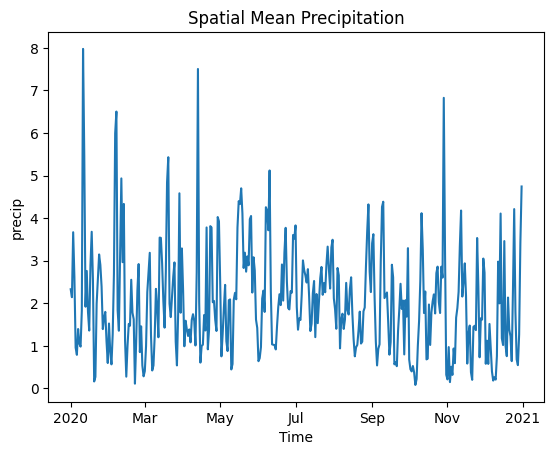

In [10]:
import matplotlib.pyplot as plt

# Plot the spatial mean precipitation over time
spatial_mean.plot()
plt.title("Spatial Mean Precipitation")
plt.show()

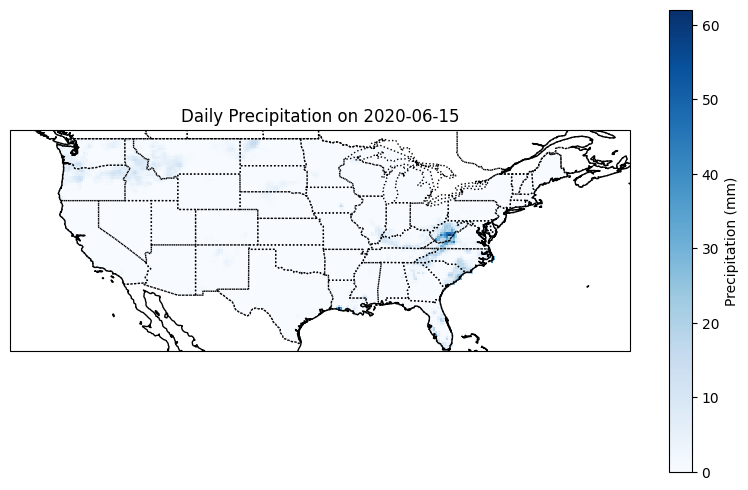

In [11]:
# Visualizing Spatial Data (Map)
# To plot precipitation over a geographic area for a specific day or averaged over a time range:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Plot precipitation for a specific day
specific_day = subset.sel(time="2020-06-15")  # Choose a date

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
precip = specific_day["precip"].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",
    cbar_kwargs={"label": "Precipitation (mm)"}
)
ax.set_title("Daily Precipitation on 2020-06-15")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, linestyle=":")
plt.show()

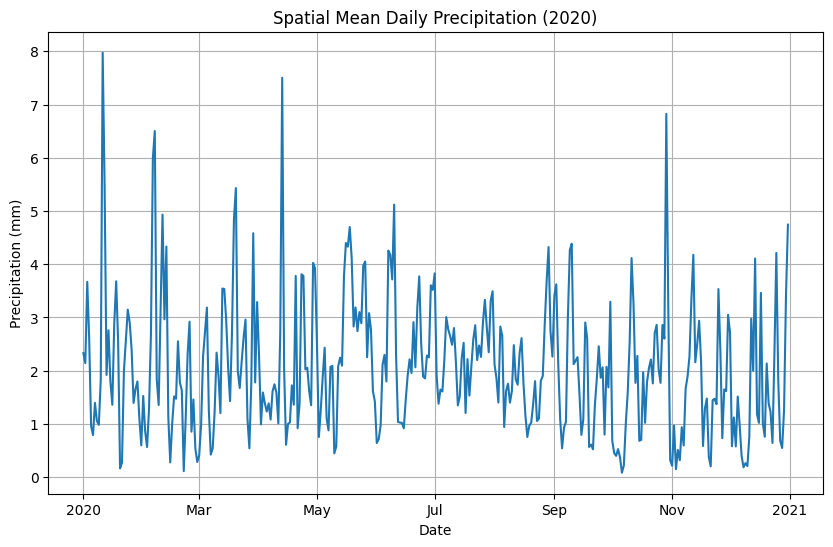

In [12]:
# Time Series Plot
# Calculate spatial mean precipitation
spatial_mean = subset["precip"].mean(dim=["latitude", "longitude"])

plt.figure(figsize=(10, 6))
spatial_mean.plot()
plt.title("Spatial Mean Daily Precipitation (2020)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid()
plt.show()

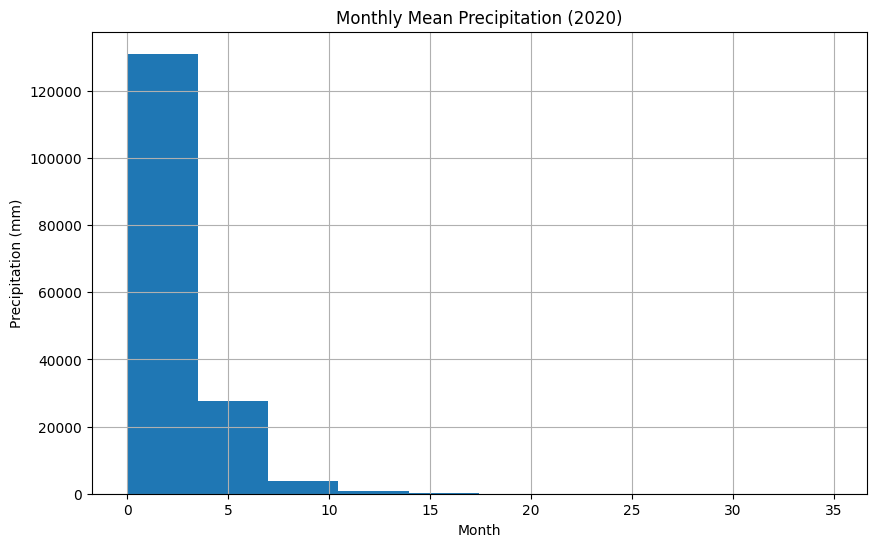

In [13]:
# Monthly Average Precipitation
# To visualize seasonal trends:

# Compute monthly means
monthly_mean = subset["precip"].groupby("time.month").mean(dim="time")

plt.figure(figsize=(10, 6))
monthly_mean.plot()
plt.title("Monthly Mean Precipitation (2020)")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.grid()
plt.show()

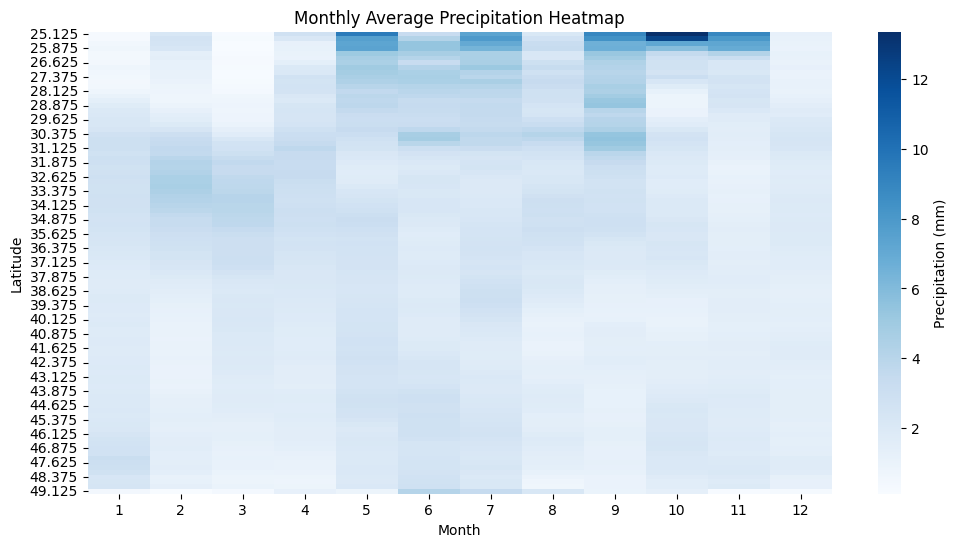

In [14]:
# Spatial Aggregation and Heatmap
# To show aggregated precipitation over time as a heatmap:

import seaborn as sns
import pandas as pd

# Aggregate data (e.g., by month and location)
monthly_precip = subset["precip"].groupby("time.month").mean(dim="time")
monthly_df = monthly_precip.mean(dim=["longitude"]).to_dataframe()

# Plot as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    monthly_df.pivot_table(index="latitude", columns="month", values="precip"),
    cmap="Blues",
    cbar_kws={"label": "Precipitation (mm)"}
)
plt.title("Monthly Average Precipitation Heatmap")
plt.xlabel("Month")
plt.ylabel("Latitude")
plt.show()

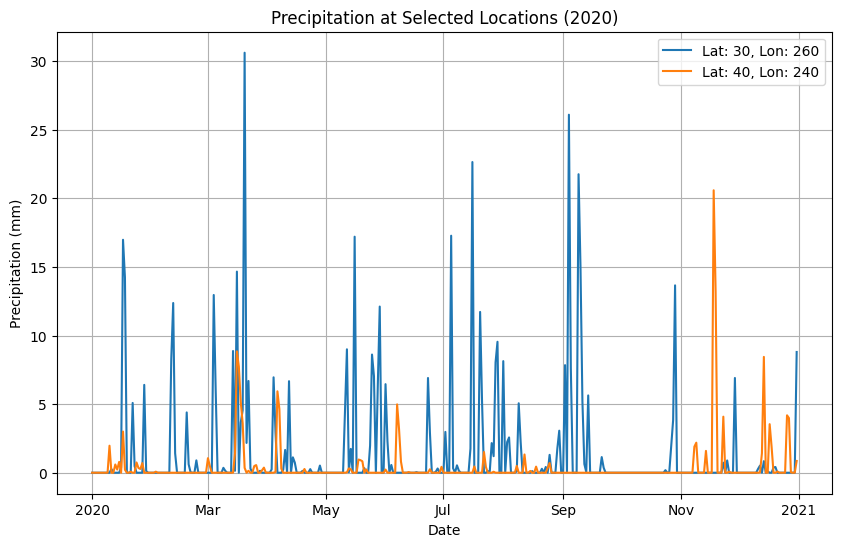

In [43]:
# Comparing Locations
# To plot precipitation for multiple locations over time:

# Select specific locations
locations = [(30, 260), (40, 240)]  # (latitude, longitude) pairs

plt.figure(figsize=(10, 6))
for lat, lon in locations:
    location_precip = subset.sel(latitude=lat, longitude=lon, method="nearest")["precip"]
    location_precip.plot(label=f"Lat: {lat}, Lon: {lon}")

plt.title("Precipitation at Selected Locations (2020)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid()
plt.show()

Subset info:
<xarray.Dataset> Size: 1MB
Dimensions:    (latitude: 100, longitude: 280, time: 11)
Coordinates:
  * latitude   (latitude) float32 400B 25.12 25.38 25.62 ... 49.38 49.62 49.88
  * longitude  (longitude) float32 1kB 230.1 230.4 230.6 ... 299.4 299.6 299.9
  * time       (time) datetime64[ns] 88B 2020-06-10 2020-06-11 ... 2020-06-20
Data variables:
    precip     (time, latitude, longitude) float32 1MB dask.array<chunksize=(11, 4, 24), meta=np.ndarray>
Attributes:
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    Conventions:    COARDS
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    description:    Gridded daily Precipitation
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    platform:       Observations
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
Animati

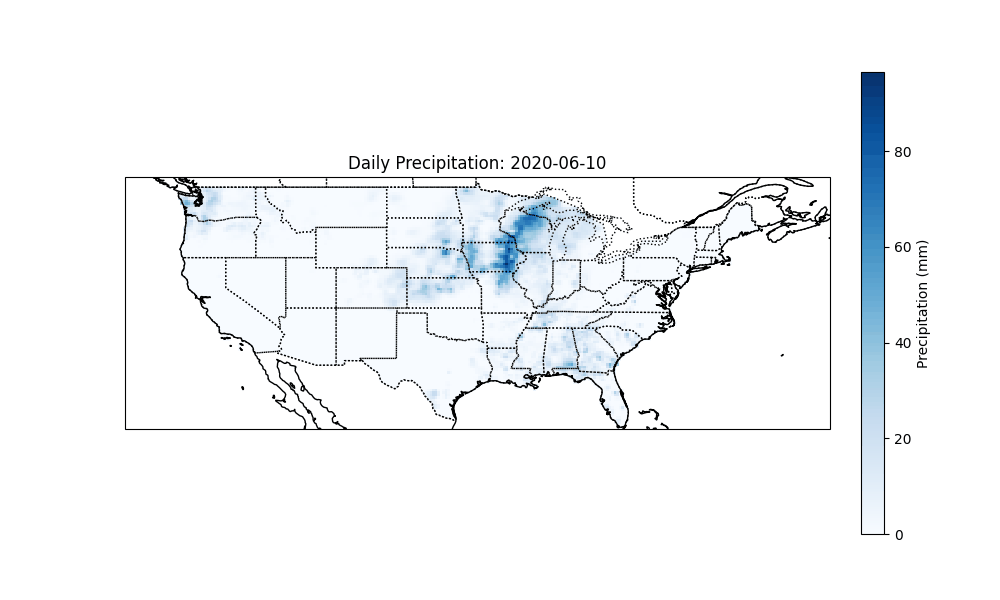

In [44]:
# Create animated GIF

import matplotlib.animation as animation

# Define bounding box and time range
lat_min, lat_max = 25, 50  # Latitude range
lon_min, lon_max = 230, 300  # Longitude range
start_date = "2020-06-10"
end_date = "2020-06-20"

# Subset the data
subset = ds.sel(
    latitude=slice(lat_min, lat_max),
    longitude=slice(lon_min, lon_max),
    time=slice(start_date, end_date)
)
print("Subset info:")
print(subset)

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Add a single colorbar outside the update function
cbar = None  # Global colorbar reference

def update(frame):
    """Update function for each frame."""
    global cbar  # Refer to the global colorbar

    ax.clear()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.STATES, linestyle=":")

    # Extract precipitation data for the current day
    day_precip = subset.isel(time=frame)["precip"]

    # Plot the precipitation
    precip_plot = day_precip.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="Blues",
        add_colorbar=False  # Prevent automatic addition of a colorbar
    )

    # Add a single colorbar if it hasn't been created
    if cbar is None:
        cbar = fig.colorbar(precip_plot, ax=ax, orientation="vertical", fraction=0.05, pad=0.04)
        cbar.set_label("Precipitation (mm)")

    # Set dynamic title with the current date
    ax.set_title(f"Daily Precipitation: {str(day_precip.time.values)[:10]}")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(subset.time), interval=500)

# Save the animation as a GIF
ani.save("precipitation_animation.gif", writer="pillow")
print("Animation saved as 'precipitation_animation.gif'.")

# Close the figure to prevent the static plot from being displayed
plt.close(fig)

from IPython.display import Image, display

# Display the generated GIF
display(Image(filename="precipitation_animation.gif"))

# Optionally display the animation (useful for notebooks)
# plt.show()
